In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
os.getcwd()

'C:\\Users\\Rhea\\Downloads'

In [3]:
company_df= pd.read_excel("Company_Data2015-1.xlsx")

In [4]:
company_df.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [5]:
company_df.columns = company_df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_').str.replace('-', '_').str.replace('[', '_').str.replace(']', '_').str.replace('.', '_')

In [6]:
company_df.head()

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,...,PBIDTM_perc_Latest_,PBITM_perc_Latest_,PBDTM_perc_Latest_,CPM_perc_Latest_,APATM_perc_Latest_,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [7]:
company_df.tail()

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,...,PBIDTM_perc_Latest_,PBITM_perc_Latest_,PBDTM_perc_Latest_,CPM_perc_Latest_,APATM_perc_Latest_,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
3581,4987,HDFC Bank,72677.77,501.30,62009.42,590576.00,496009.19,8463.30,0.00,444633.50,...,0.00,0.00,0.00,0.00,0.00,0,0,NaN,0.60,7.76
3582,502,Vedanta,79162.19,296.50,34057.87,71906.06,37643.79,29848.44,2503.86,11554.45,...,39.92,32.17,29.81,30.52,22.77,13,53,77.0,0.29,1.00
3583,12002,I O C L,88134.31,2427.95,67969.97,140686.75,55245.01,121643.45,6376.84,89609.82,...,8.09,6.69,7.31,5.69,4.29,7,30,48.0,1.42,3.24
3584,12001,NTPC,91293.70,8245.46,81657.35,173099.14,85995.34,128477.59,11449.79,42353.59,...,28.12,20.55,23.39,19.55,11.99,32,69,42.0,0.36,0.68
3585,15542,Bharti Airtel,111729.10,1998.70,78270.80,104241.00,21569.70,100084.90,-12145.30,11947.10,...,42.47,22.88,34.04,25.97,6.37,18,74,0.0,0.42,0.49


In [8]:
print('The number of rows (observations) is',company_df.shape[0],'\n''The number of columns (variables) is',company_df.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


In [9]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block_                         3586 non-null   float64
 8   Net_Working_Capital_                 3586 non-null   float64
 9   Current_Assets_                      3586 non-null   float64
 10  Current_Liabilities_and_Provisions_  3586 non-null   float64
 11  Total_Assets_to_Liabilities_  

In [10]:
company_df.describe(include='all')

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,...,PBIDTM_perc_Latest_,PBITM_perc_Latest_,PBDTM_perc_Latest_,CPM_perc_Latest_,APATM_perc_Latest_,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
count,3586.000000,3586,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,...,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3586.000000,3.586000e+03,3483.000000,3586.000000,3586.000000
unique,NaN,3586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,ANS Industries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,16065.388734,NaN,725.045251,62.966584,649.746299,2799.611054,1994.823779,594.178829,410.809665,1960.349172,...,-51.162890,-109.213414,-311.570357,-307.005632,-365.056187,603.894032,2.057855e+03,79.644559,0.819757,61.884548
std,19776.817379,NaN,4769.681004,778.761744,4091.988792,26975.135385,23652.842746,4871.547802,6301.218546,22577.570829,...,1795.131025,3057.635870,10921.592639,10676.149629,12500.051387,10636.759580,5.416948e+04,137.847792,1.201400,976.824352
min,4.000000,NaN,-8021.600000,0.000000,-7027.480000,-1824.750000,-0.720000,-41.190000,-13162.420000,-0.910000,...,-78870.450000,-141600.000000,-590500.000000,-572000.000000,-688600.000000,0.000000,0.000000e+00,-199.000000,-0.330000,-61.000000
25%,3029.250000,NaN,3.985000,3.750000,3.892500,7.602500,0.030000,0.570000,0.942500,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000e+00,0.000000,0.070000,0.270000
50%,6077.500000,NaN,19.015000,8.290000,18.580000,39.090000,7.490000,15.870000,10.145000,24.540000,...,8.070000,5.230000,4.690000,3.890000,1.590000,49.000000,3.900000e+01,35.000000,0.480000,1.530000
75%,24269.500000,NaN,123.802500,19.517500,117.297500,226.605000,72.350000,131.895000,61.175000,135.277500,...,18.990000,14.290000,14.110000,11.390000,7.410000,106.000000,8.900000e+01,96.000000,1.160000,4.910000


In [11]:
pd.options.display.float_format = '{:.2f}'.format   

company_df.describe()

,Co_Code,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,...,PBIDTM_perc_Latest_,PBITM_perc_Latest_,PBDTM_perc_Latest_,CPM_perc_Latest_,APATM_perc_Latest_,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
count,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,...,3585.00,3585.00,3585.00,3585.00,3585.00,3586.00,3586.00,3483.00,3586.00,3586.00
mean,16065.39,725.05,62.97,649.75,2799.61,1994.82,594.18,410.81,1960.35,391.99,...,-51.16,-109.21,-311.57,-307.01,-365.06,603.89,2057.85,79.64,0.82,61.88
std,19776.82,4769.68,778.76,4091.99,26975.14,23652.84,4871.55,6301.22,22577.57,2675.00,...,1795.13,3057.64,10921.59,10676.15,12500.05,10636.76,54169.48,137.85,1.20,976.82
min,4.00,-8021.60,0.00,-7027.48,-1824.75,-0.72,-41.19,-13162.42,-0.91,-0.23,...,-78870.45,-141600.00,-590500.00,-572000.00,-688600.00,0.00,0.00,-199.00,-0.33,-61.00
25%,3029.25,3.98,3.75,3.89,7.60,0.03,0.57,0.94,4.00,0.73,...,0.00,0.00,0.00,0.00,0.00,8.00,8.00,0.00,0.07,0.27
50%,6077.50,19.02,8.29,18.58,39.09,7.49,15.87,10.14,24.54,9.23,...,8.07,5.23,4.69,3.89,1.59,49.00,39.00,35.00,0.48,1.53
75%,24269.50,123.80,19.52,117.30,226.60,72.35,131.90,61.17,135.28,65.65,...,18.99,14.29,14.11,11.39,7.41,106.00,89.00,96.00,1.16,4.91
max,72493.00,111729.10,42263.46,81657.35,714001.25,652823.81,128477.59,223257.56,721166.00,83232.98,...,19233.33,19195.70,15640.00,15640.00,15266.67,514721.00,2034145.00,996.00,17.63,43404.00


In [12]:
company_df['default'] = np.where((company_df['Networth_Next_Year'] > 0), 0, 1)

In [13]:
company_df[['default','Networth_Next_Year']].head(10)

,default,Networth_Next_Year
0,1,-8021.60
1,1,-3986.19
2,1,-3192.58
3,1,-3054.51
4,1,-2967.36
5,1,-2519.40
6,1,-2125.05
7,1,-2100.56
8,1,-1695.75
9,1,-1677.18


In [14]:
company_df[['default','Networth_Next_Year']].tail(10)

,default,Networth_Next_Year
3576,0,43811.23
3577,0,46637.38
3578,0,47261.30
3579,0,53164.91
3580,0,61082.00
3581,0,72677.77
3582,0,79162.19
3583,0,88134.31
3584,0,91293.70
3585,0,111729.10


In [15]:
company_df['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [16]:
company_df['default'].value_counts(normalize = True)

0   0.89
1   0.11
Name: default, dtype: float64

In [17]:
company_df.isnull().sum()

Co_Code                              0
Co_Name                              0
Networth_Next_Year                   0
Equity_Paid_Up                       0
Networth                             0
                                  ... 
Creditors_Velocity_Days              0
Inventory_Velocity_Days            103
Value_of_Output_to_Total_Assets      0
Value_of_Output_to_Gross_Block       0
default                              0
Length: 68, dtype: int64

In [18]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 68 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block_                         3586 non-null   float64
 8   Net_Working_Capital_                 3586 non-null   float64
 9   Current_Assets_                      3586 non-null   float64
 10  Current_Liabilities_and_Provisions_  3586 non-null   float64
 11  Total_Assets_to_Liabilities_  

In [19]:
company_df.size

243848

In [20]:
company_df.shape

(3586, 68)

In [21]:
company_df.isnull().sum().sum()

118

In [22]:
Co_X = company_df.drop('default', axis = 1)
Co_Y = company_df['default']

In [23]:
Co_X

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,...,PBIDTM_perc_Latest_,PBITM_perc_Latest_,PBDTM_perc_Latest_,CPM_perc_Latest_,APATM_perc_Latest_,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.00,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.00,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.00,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.00,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.00,0.01,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,4987,HDFC Bank,72677.77,501.30,62009.42,590576.00,496009.19,8463.30,0.00,444633.50,...,0.00,0.00,0.00,0.00,0.00,0,0,NaN,0.60,7.76
3582,502,Vedanta,79162.19,296.50,34057.87,71906.06,37643.79,29848.44,2503.86,11554.45,...,39.92,32.17,29.81,30.52,22.77,13,53,77.00,0.29,1.00
3583,12002,I O C L,88134.31,2427.95,67969.97,140686.75,55245.01,121643.45,6376.84,89609.82,...,8.09,6.69,7.31,5.69,4.29,7,30,48.00,1.42,3.24
3584,12001,NTPC,91293.70,8245.46,81657.35,173099.14,85995.34,128477.59,11449.79,42353.59,...,28.12,20.55,23.39,19.55,11.99,32,69,42.00,0.36,0.68


## Outlier and Missing Value Treatment

In [24]:
Q1 = Co_X.quantile(0.25)
Q3 = Co_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [25]:
((Co_X > UL) | (Co_X < LL)).sum()

APATM_perc_Latest_                 933
Adjusted_PAT                       954
Book_Value_Adj__Unit_Curr          486
Book_Value_Unit_Curr               485
CEPS_annualised_Unit_Curr          602
                                  ... 
Total_Assets_to_Liabilities_       574
Total_Debt                         583
Value_Of_Output                    559
Value_of_Output_to_Gross_Block     481
Value_of_Output_to_Total_Assets    150
Length: 67, dtype: int64

In [26]:
Co_X[((Co_X > UL) | (Co_X < LL))]= np.nan

In [27]:
Co_X.isnull().sum()

Co_Code                            291
Co_Name                              0
Networth_Next_Year                 676
Equity_Paid_Up                     448
Networth                           650
                                  ... 
Debtors_Velocity_Days              398
Creditors_Velocity_Days            391
Inventory_Velocity_Days            365
Value_of_Output_to_Total_Assets    150
Value_of_Output_to_Gross_Block     481
Length: 67, dtype: int64

In [28]:
Co_X.isnull().sum().sum()

42440

In [29]:
Co_X = Co_X.drop(['Co_Code','Networth_Next_Year'], axis = 1)

In [30]:
company_df1 = pd.concat([Co_X, Co_Y], axis =1 )

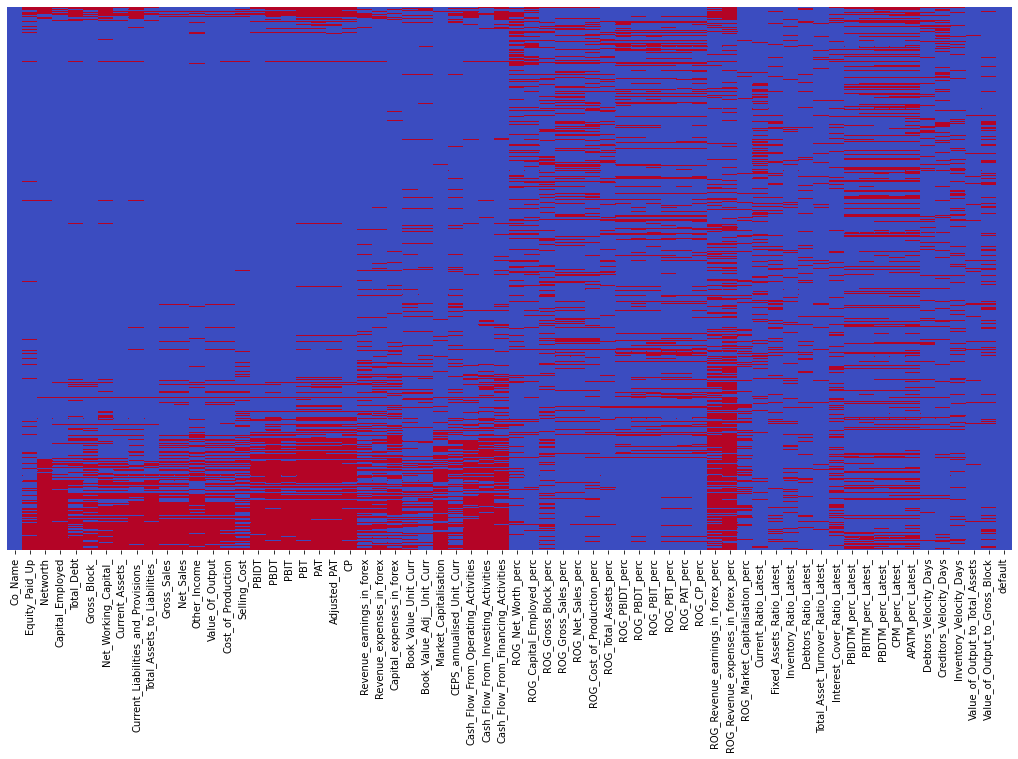

In [31]:
plt.figure(figsize = (18,10))
sns.heatmap(company_df1.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

In [32]:
company_df1.isnull().sum(axis = 1)

0       19
1       34
2       43
3       36
4       35
        ..
3581    30
3582    36
3583    34
3584    30
3585    36
Length: 3586, dtype: int64

In [33]:
Company_temp = company_df1[company_df1.isnull().sum(axis = 1) <= 5]

In [34]:
Company_temp.shape

(1203, 66)

In [35]:
Company_temp['default'].value_counts()

0    1085
1     118
Name: default, dtype: int64

In [36]:
118/388

0.30412371134020616

In [37]:
company_df1.isnull().sum().sort_values(ascending = False)/company_df1.index.size

ROG_Revenue_expenses_in_forex_perc    0.45
ROG_Revenue_earnings_in_forex_perc    0.37
Cash_Flow_From_Financing_Activities   0.28
PAT                                   0.27
Adjusted_PAT                          0.27
                                      ... 
Inventory_Velocity_Days               0.10
Total_Asset_Turnover_Ratio_Latest_    0.06
Value_of_Output_to_Total_Assets       0.04
Co_Name                               0.00
default                               0.00
Length: 66, dtype: float64

In [38]:
company_df2 = company_df1.drop(['Co_Name','ROG_Revenue_expenses_in_forex_perc', 'ROG_Revenue_earnings_in_forex_perc'],axis = 1)

In [39]:
company_df2.shape

(3586, 63)

In [40]:
predictors = company_df2.drop('default', axis = 1)
response = company_df2['default']

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [42]:
company_df3 = pd.concat([scaled_predictors, response], axis = 1)

In [43]:
from sklearn.impute import KNNImputer

In [44]:
imputer = KNNImputer(n_neighbors=10)

In [45]:
Co_imputed = pd.DataFrame(imputer.fit_transform(company_df3), columns = company_df3.columns)

In [46]:
Co_imputed.isnull().sum().sum()

0

In [47]:
Co_imputed

,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets_to_Liabilities_,Gross_Sales,...,PBITM_perc_Latest_,PBDTM_perc_Latest_,CPM_perc_Latest_,APATM_perc_Latest_,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,default
0,-0.04,-0.37,-0.37,0.06,-0.37,-0.22,-0.07,-0.34,0.04,-0.60,...,-0.72,-0.71,-0.72,-0.61,-0.95,-0.95,-0.05,-0.97,-0.81,1.00
1,1.73,-0.21,1.02,1.02,1.13,0.68,0.53,1.01,1.69,0.73,...,-0.96,-0.86,-0.41,-0.19,-0.43,1.21,-0.81,-0.50,-0.71,1.00
2,0.88,2.01,1.44,-0.03,2.13,0.12,1.89,1.85,2.46,2.42,...,-0.45,-0.54,-0.55,-0.06,0.79,0.38,-0.85,-1.02,-0.91,1.00
3,0.13,0.47,0.90,0.42,0.66,0.90,0.61,0.15,0.85,-0.10,...,-1.49,-0.50,-0.80,-0.72,0.72,0.40,-0.81,-0.61,-0.06,1.00
4,1.32,1.27,0.36,0.91,0.81,0.28,0.18,0.22,1.34,-0.31,...,-0.32,0.10,-0.31,-0.91,0.73,1.10,-0.85,-0.96,-0.79,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,-0.60,-0.19,-0.38,-0.43,-0.30,-0.60,-0.53,-0.55,-0.46,-0.26,...,-0.72,-0.71,-0.72,-0.61,-0.95,-0.95,-0.85,-0.06,2.24,0.00
3582,0.20,0.58,0.55,0.06,0.30,-0.29,0.01,0.89,0.77,0.51,...,2.72,2.40,2.18,2.02,-0.72,0.19,0.52,-0.53,-0.41,0.00
3583,0.39,0.99,0.47,0.33,1.22,0.38,0.97,1.15,0.60,1.42,...,-0.01,0.06,0.02,0.23,-0.83,-0.31,0.01,1.18,0.47,0.00
3584,0.69,0.88,0.65,0.54,0.83,-0.47,0.49,0.52,0.53,0.29,...,1.48,1.73,1.83,1.72,-0.38,0.53,-0.10,-0.43,-0.54,0.00


## Univariate Analysis on Raw Data

In [48]:
categorical_features=[]
numerical_features=[]
for i in company_df.columns:
    if company_df[i].dtype=="object":
        categorical_features.append(i)
    else:
        numerical_features.append(i)
print("Categorical Features -"), print(categorical_features)
print("Numerical Features -"), print(numerical_features) 

Categorical Features -
['Co_Name']
Numerical Features -
['Co_Code', 'Networth_Next_Year', 'Equity_Paid_Up', 'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block_', 'Net_Working_Capital_', 'Current_Assets_', 'Current_Liabilities_and_Provisions_', 'Total_Assets_to_Liabilities_', 'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output', 'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT', 'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex', 'Revenue_expenses_in_forex', 'Capital_expenses_in_forex', 'Book_Value_Unit_Curr', 'Book_Value_Adj__Unit_Curr', 'Market_Capitalisation', 'CEPS_annualised_Unit_Curr', 'Cash_Flow_From_Operating_Activities', 'Cash_Flow_From_Investing_Activities', 'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc', 'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc', 'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc', 'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc', 'ROG_PBIDT_perc', 'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc'

(None, None)

In [49]:
df_num =company_df1[['Equity_Paid_Up', 'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block_', 'Net_Working_Capital_', 'Current_Assets_', 'Current_Liabilities_and_Provisions_', 'Total_Assets_to_Liabilities_', 'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output', 'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT', 'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex', 'Revenue_expenses_in_forex', 'Capital_expenses_in_forex', 'Book_Value_Unit_Curr', 'Book_Value_Adj__Unit_Curr', 'Market_Capitalisation', 'CEPS_annualised_Unit_Curr', 'Cash_Flow_From_Operating_Activities', 'Cash_Flow_From_Investing_Activities', 'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc', 'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc', 'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc', 'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc', 'ROG_PBIDT_perc', 'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc', 'ROG_PAT_perc', 'ROG_CP_perc', 'ROG_Market_Capitalisation_perc', 'Current_Ratio_Latest_', 'Fixed_Assets_Ratio_Latest_', 'Inventory_Ratio_Latest_', 'Debtors_Ratio_Latest_', 'Total_Asset_Turnover_Ratio_Latest_', 'Interest_Cover_Ratio_Latest_', 'PBIDTM_perc_Latest_', 'PBITM_perc_Latest_', 'PBDTM_perc_Latest_', 'CPM_perc_Latest_', 'APATM_perc_Latest_', 'Debtors_Velocity_Days', 'Creditors_Velocity_Days', 'Inventory_Velocity_Days', 'Value_of_Output_to_Total_Assets', 'Value_of_Output_to_Gross_Block', 'default']]

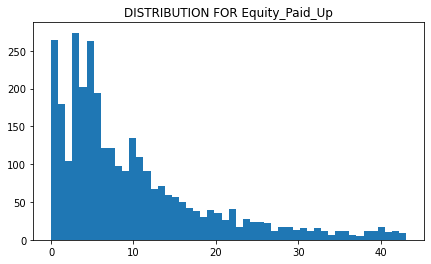

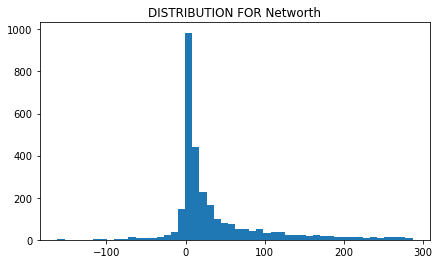

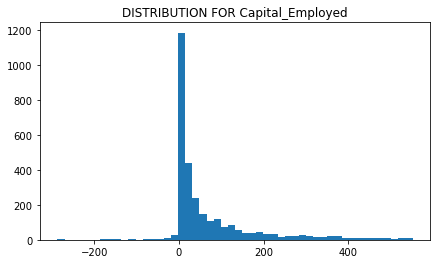

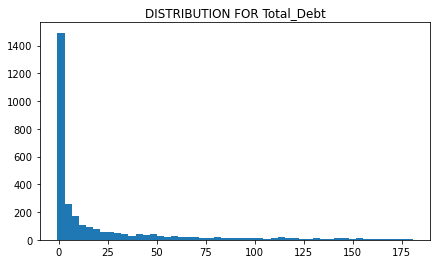

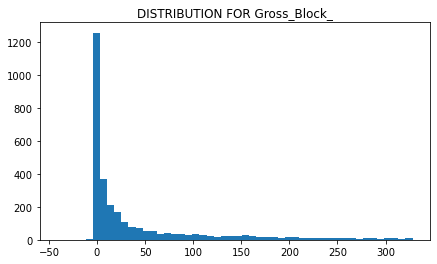

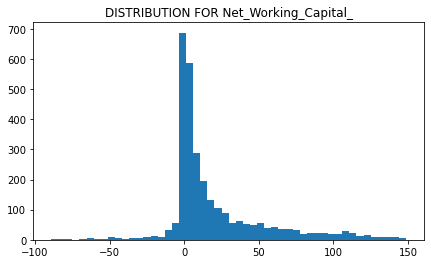

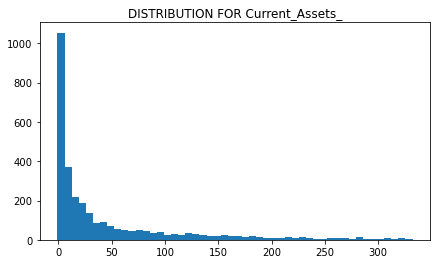

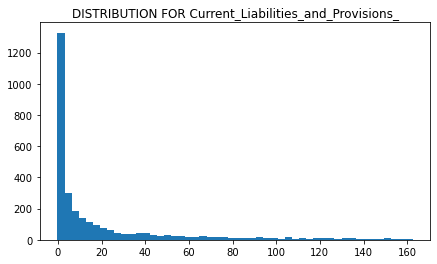

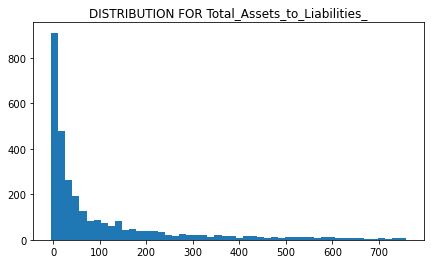

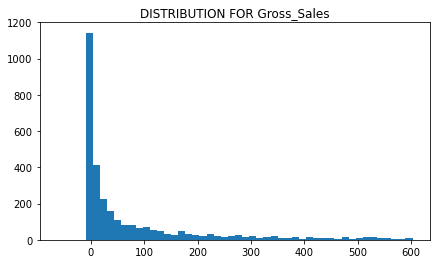

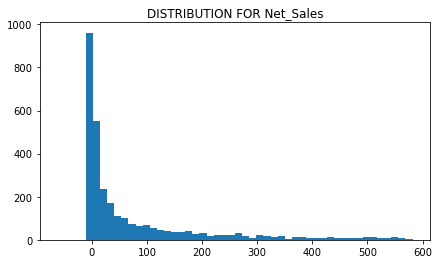

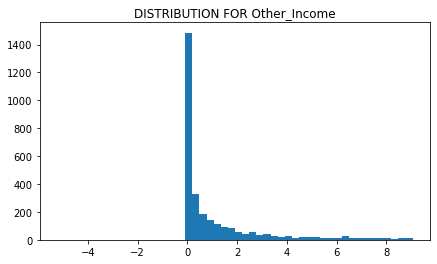

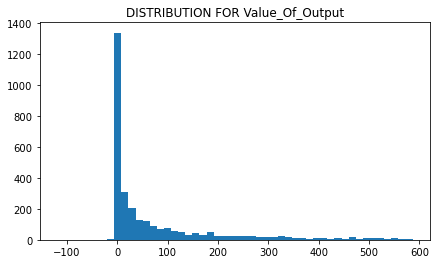

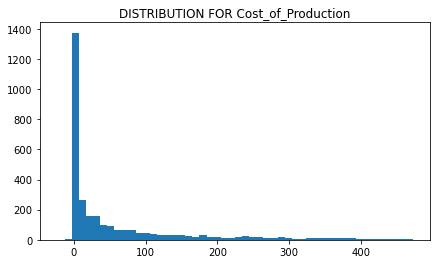

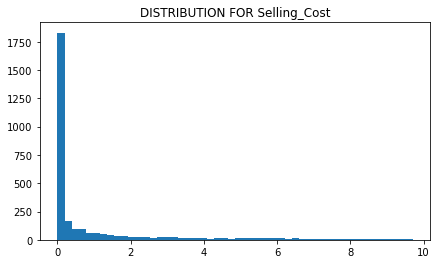

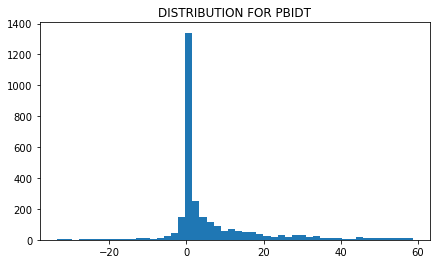

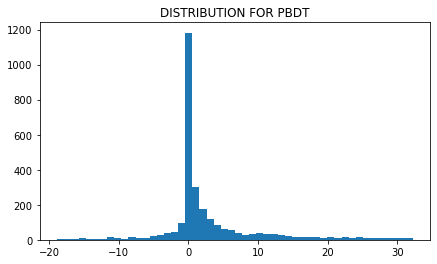

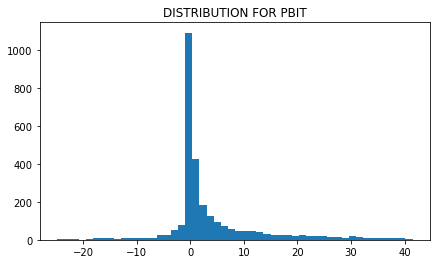

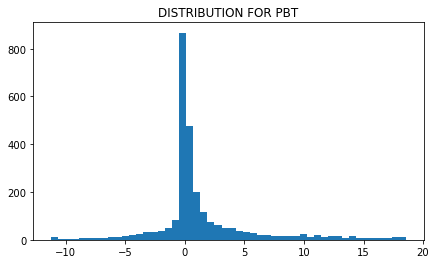

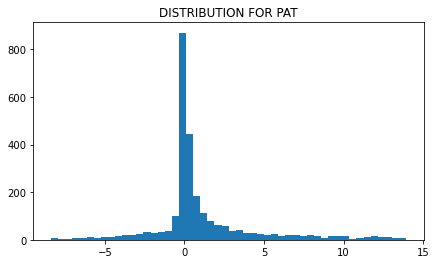

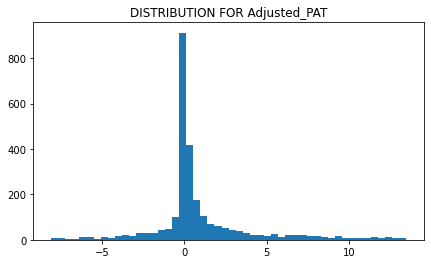

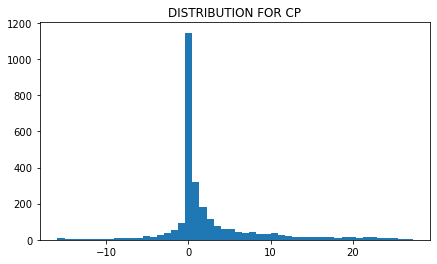

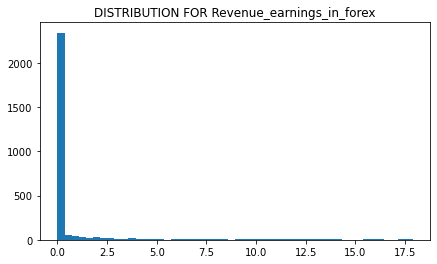

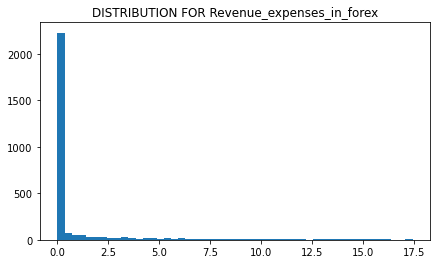

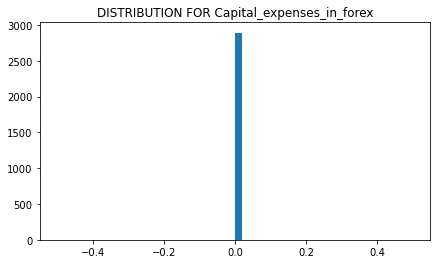

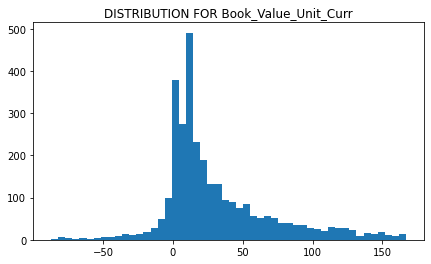

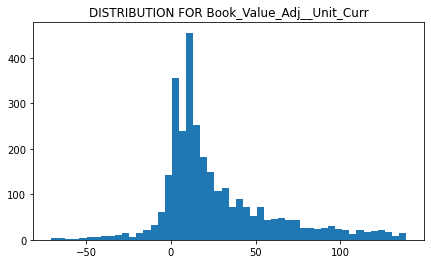

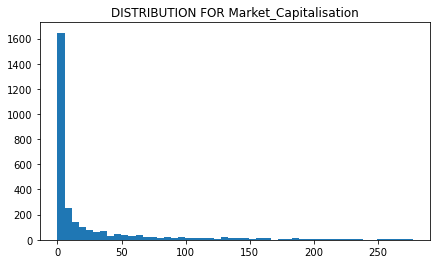

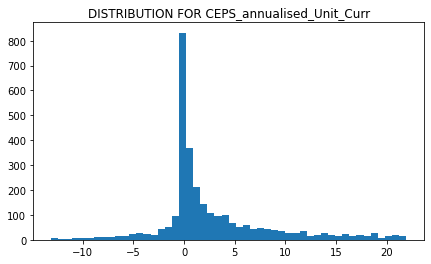

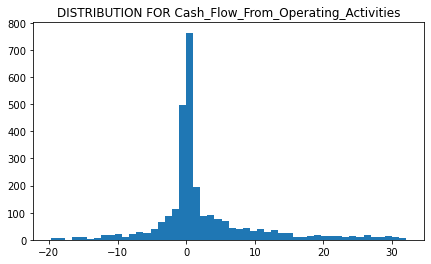

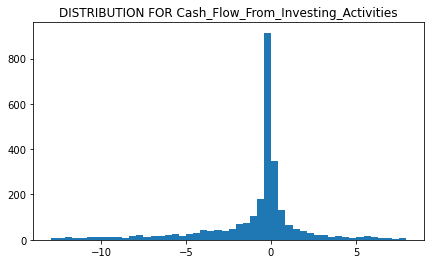

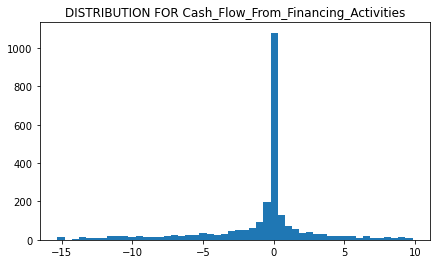

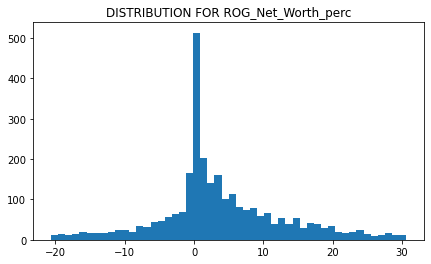

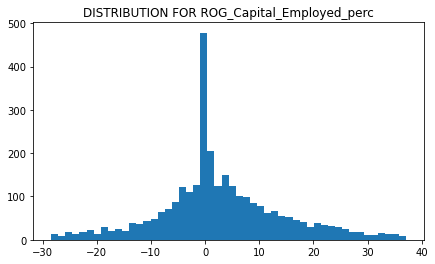

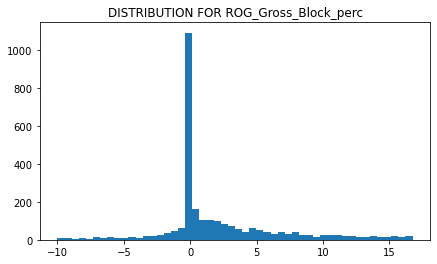

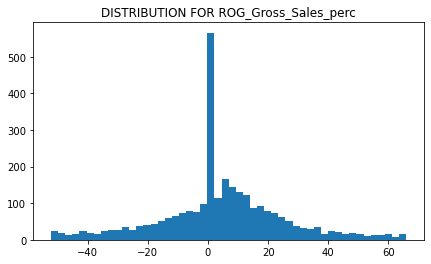

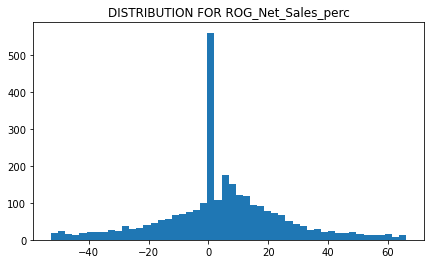

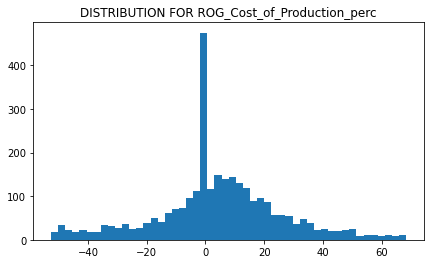

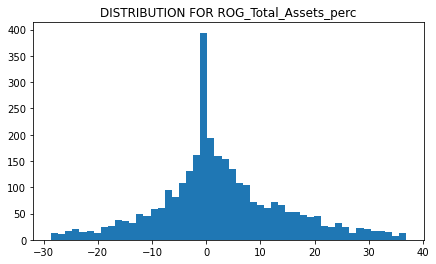

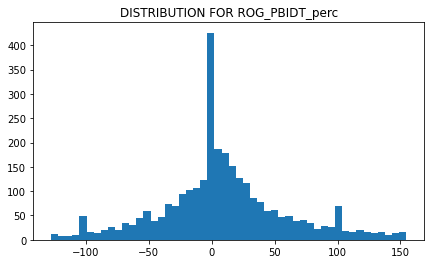

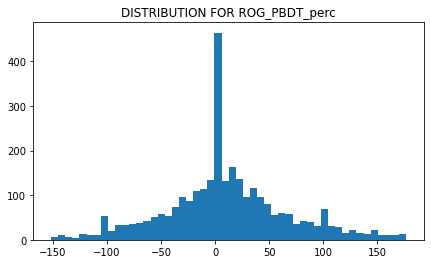

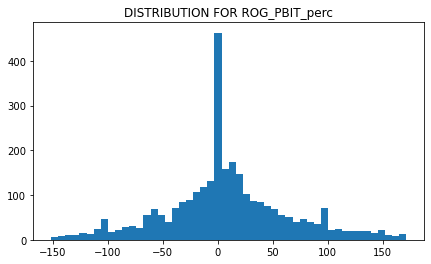

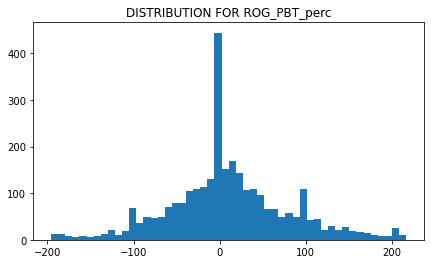

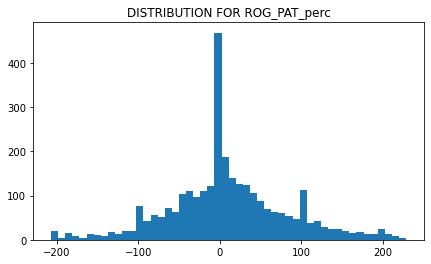

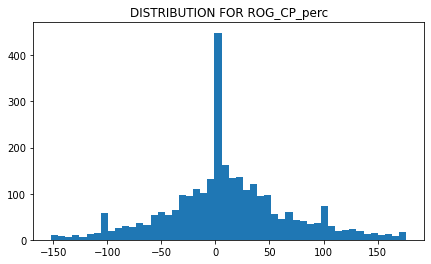

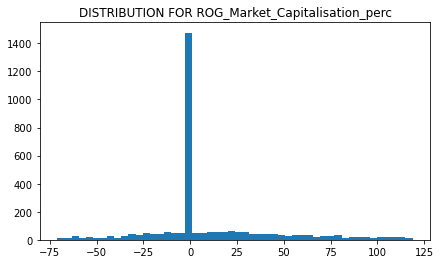

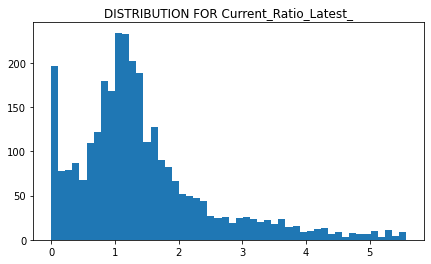

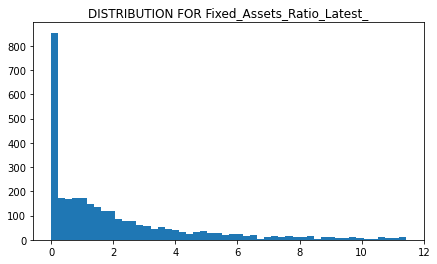

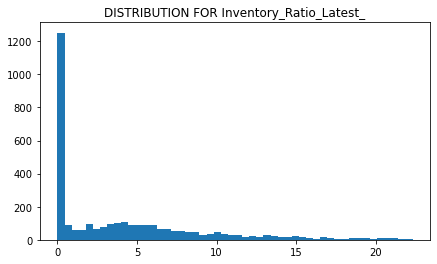

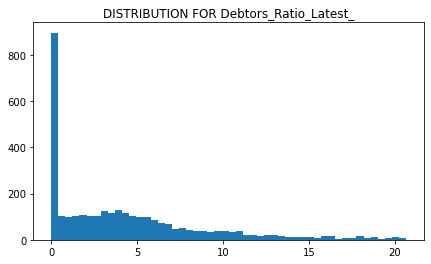

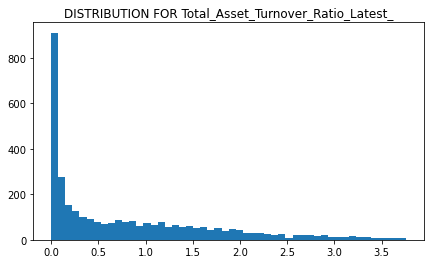

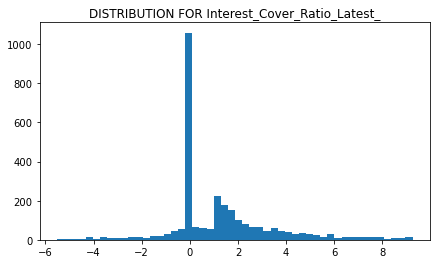

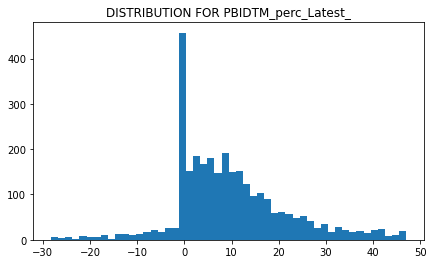

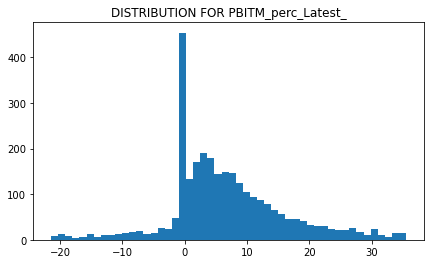

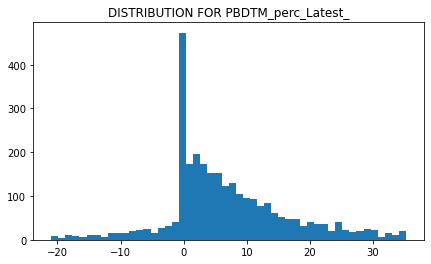

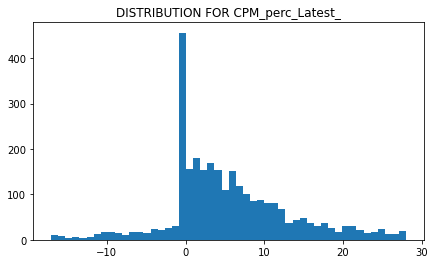

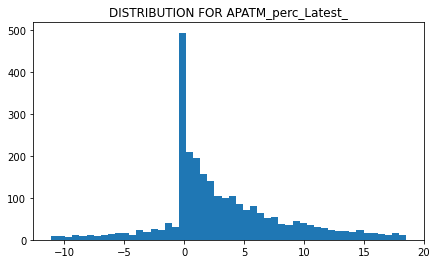

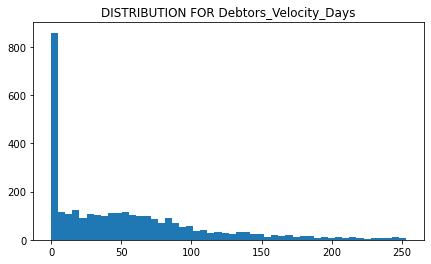

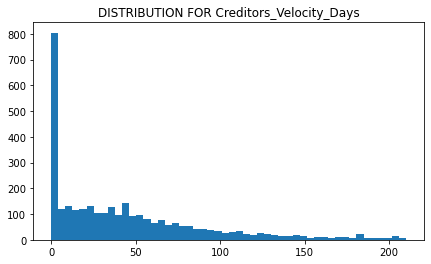

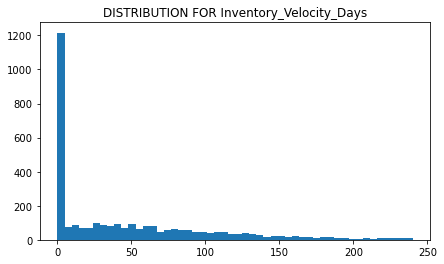

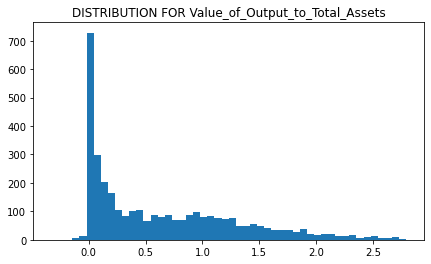

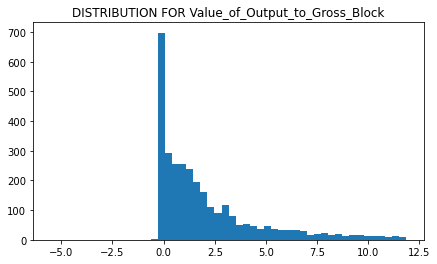

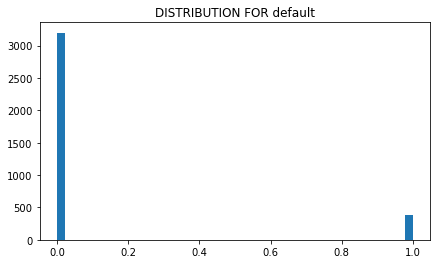

In [50]:
def plot_distribution(df_num, feature_list):
    for n in feature_list:
        plt.figure(figsize=(7,4))
        plt.hist(df_num[n], bins=50)
        plt.title("DISTRIBUTION FOR {}".format(n))
plot_distribution(df_num, df_num.columns)

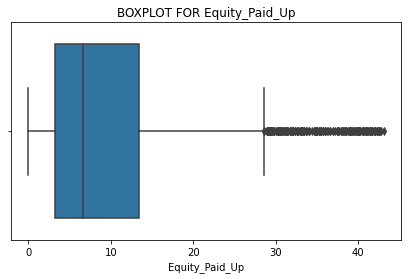

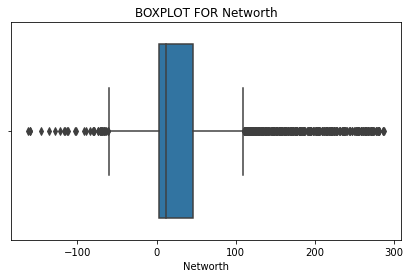

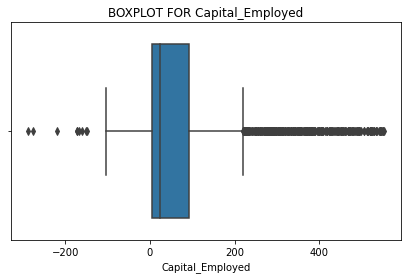

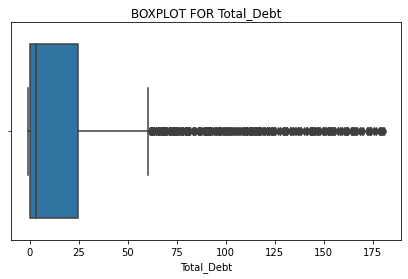

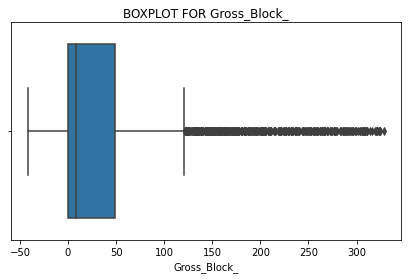

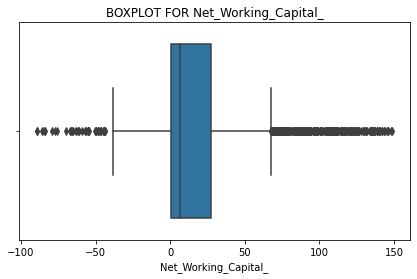

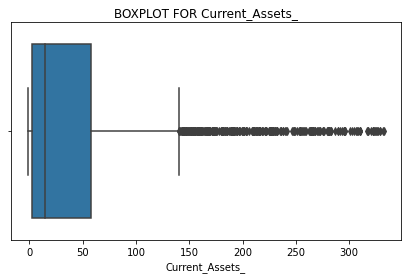

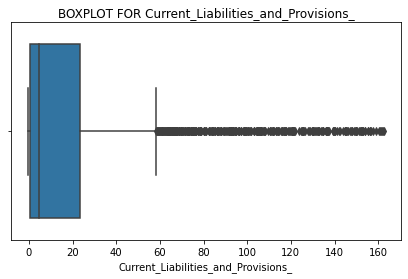

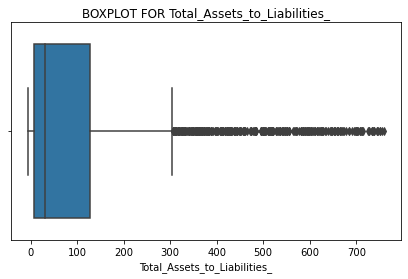

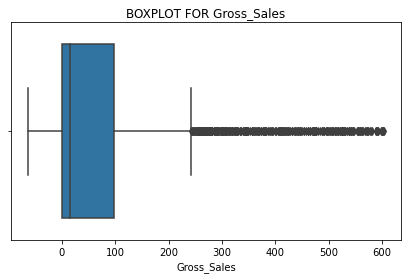

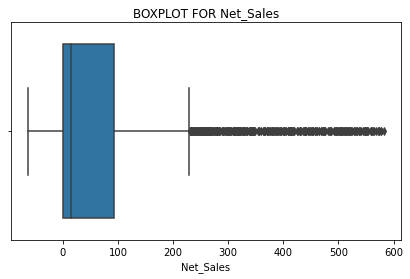

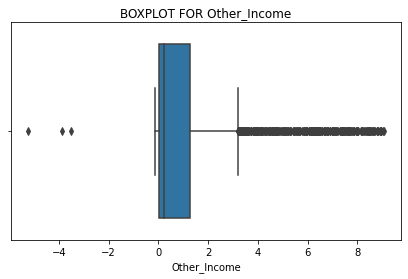

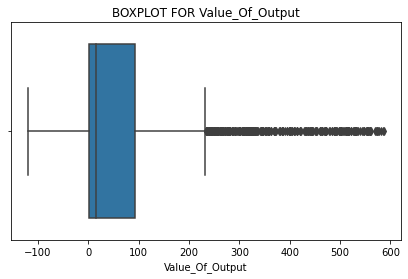

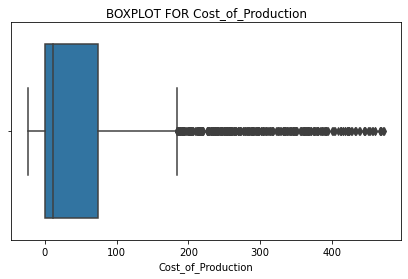

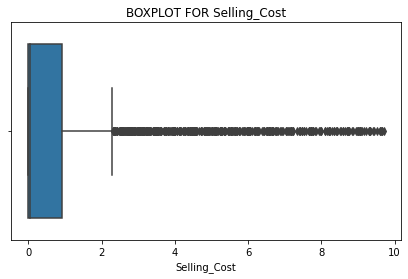

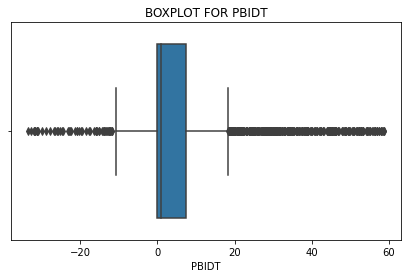

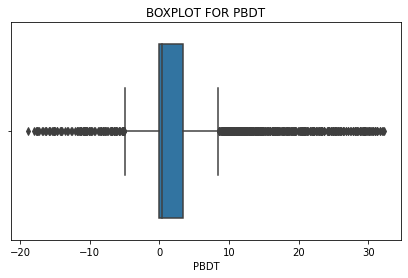

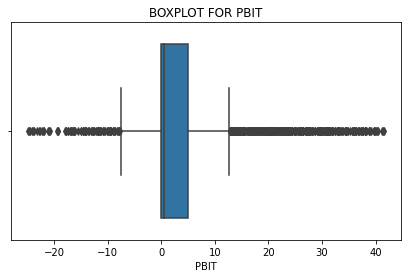

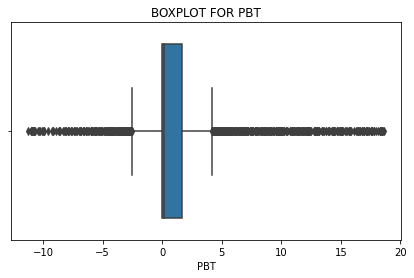

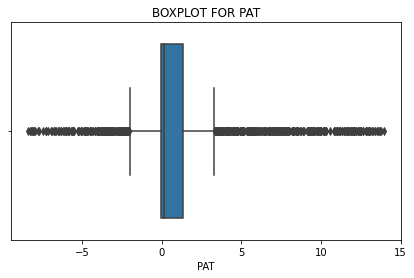

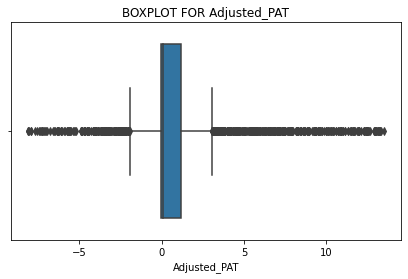

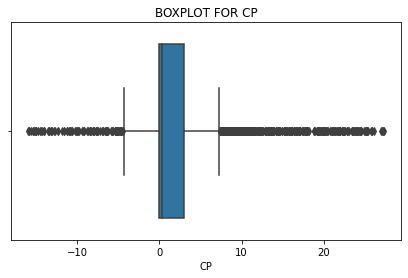

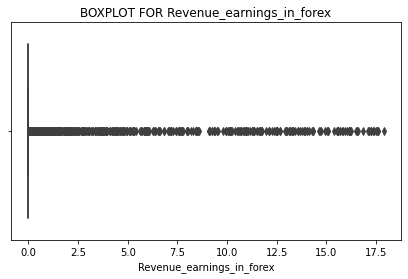

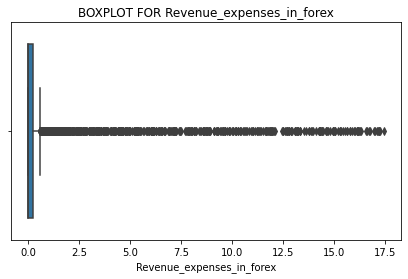

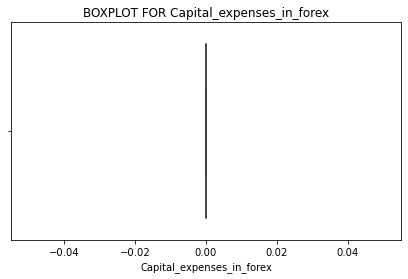

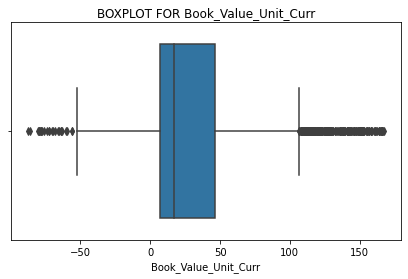

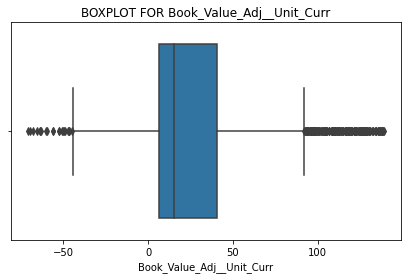

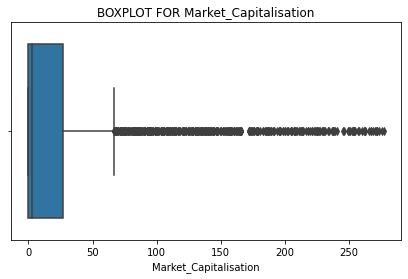

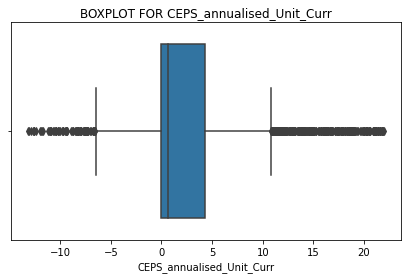

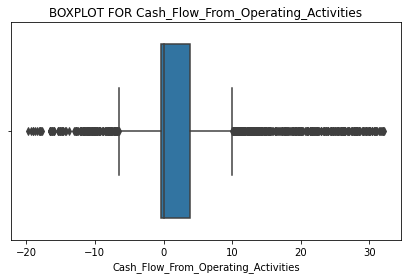

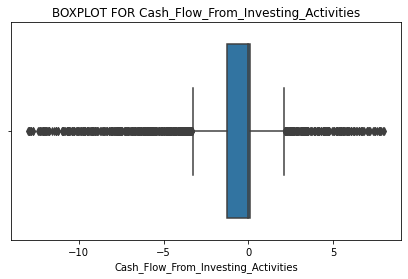

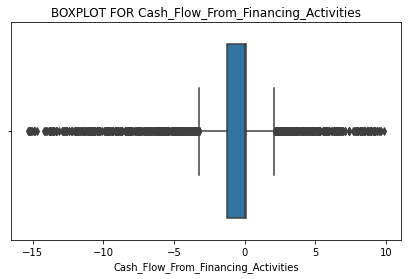

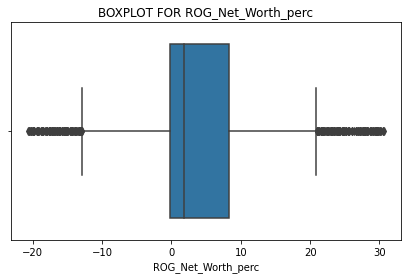

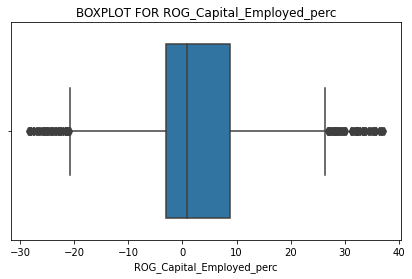

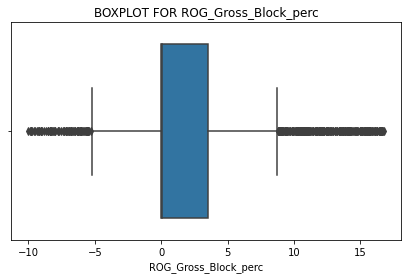

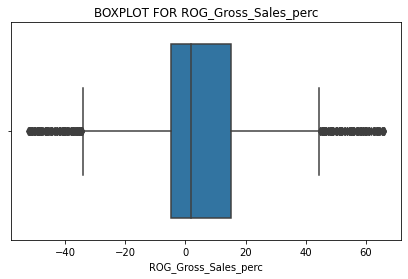

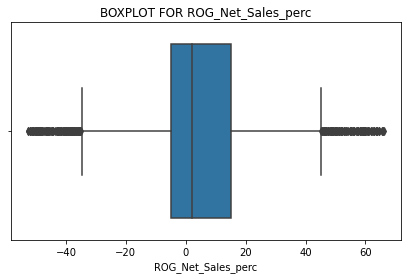

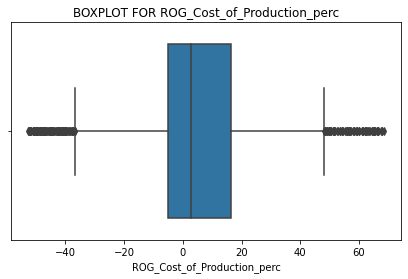

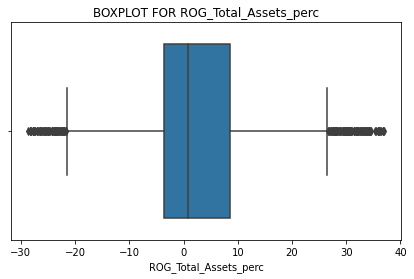

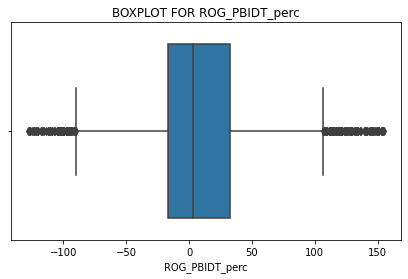

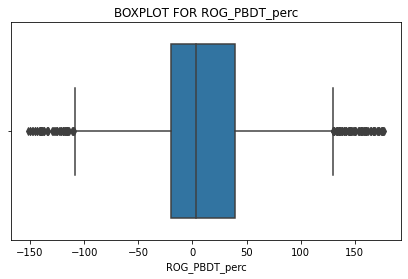

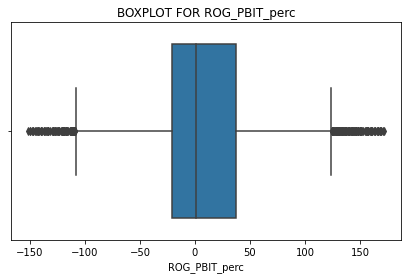

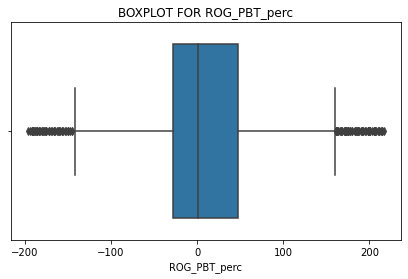

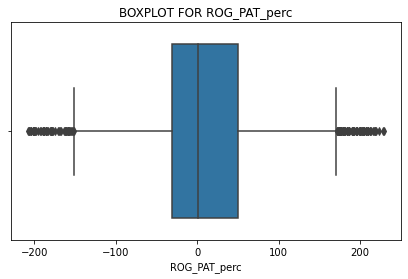

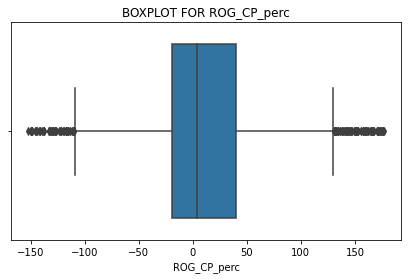

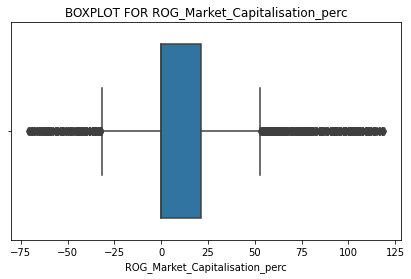

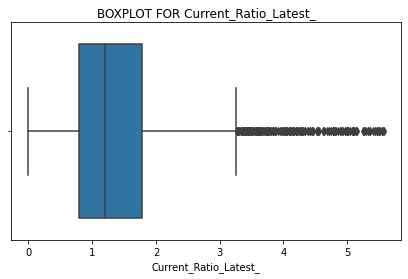

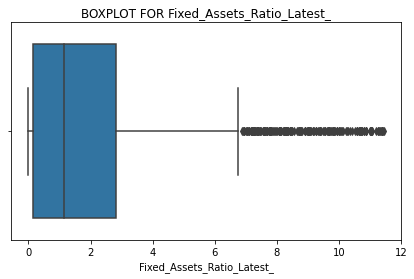

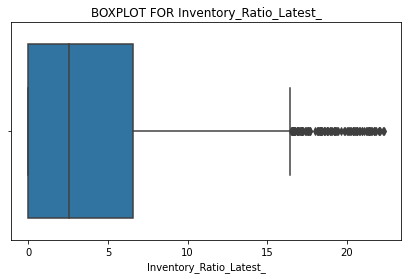

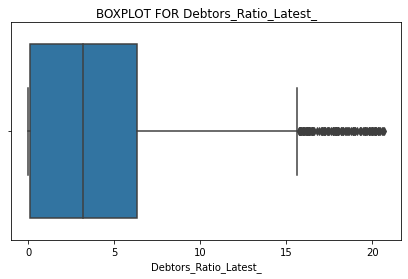

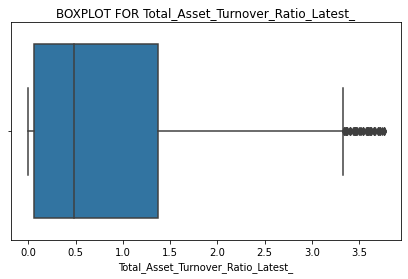

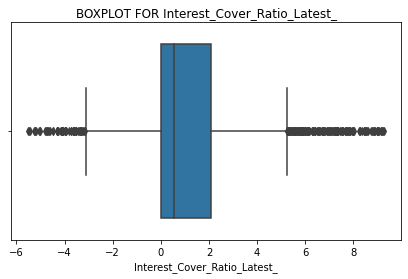

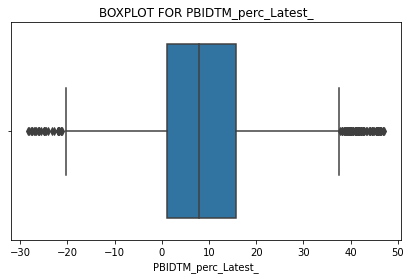

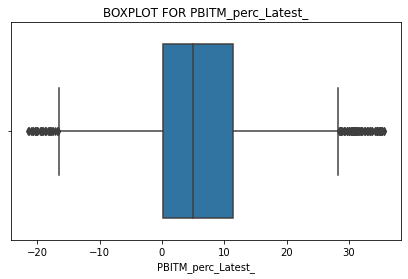

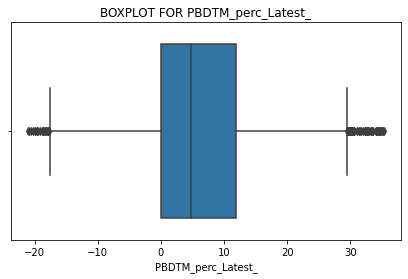

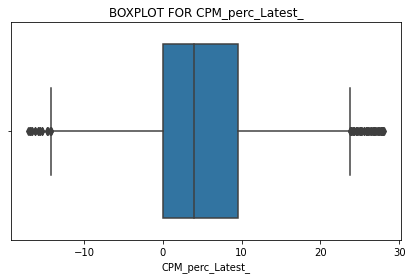

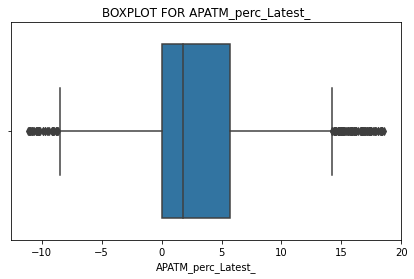

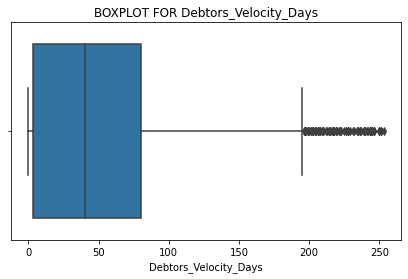

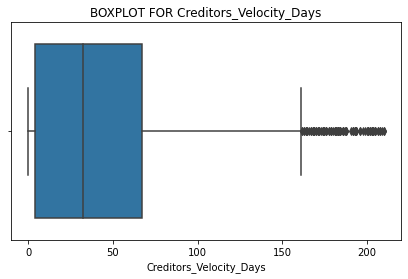

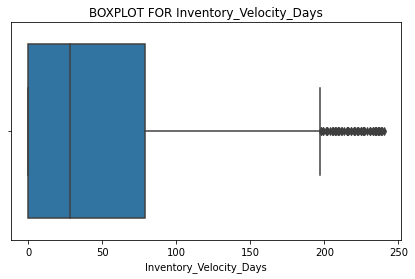

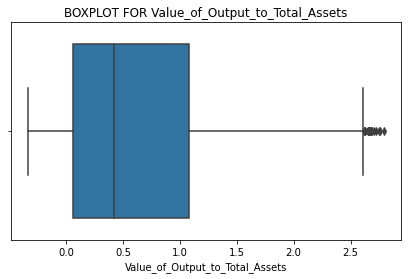

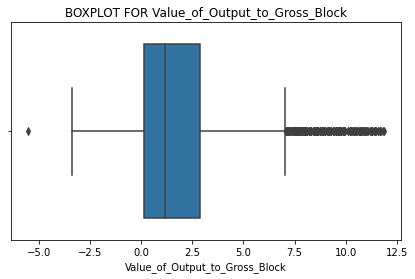

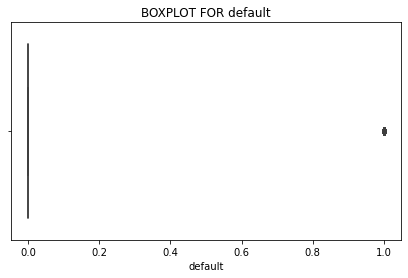

In [51]:
def plot_boxplot(data, feature_list):
    for n in feature_list:
        plt.figure(figsize=(7,4))
        sns.boxplot(df_num[n])
        plt.title("BOXPLOT FOR {}".format(n))
plot_boxplot(df_num, df_num.columns)  

## Outliers treated

In [52]:
df_num1 =Co_imputed[['Equity_Paid_Up', 'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block_', 'Net_Working_Capital_', 'Current_Assets_', 'Current_Liabilities_and_Provisions_', 'Total_Assets_to_Liabilities_', 'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output', 'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT', 'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex', 'Revenue_expenses_in_forex', 'Capital_expenses_in_forex', 'Book_Value_Unit_Curr', 'Book_Value_Adj__Unit_Curr', 'Market_Capitalisation', 'CEPS_annualised_Unit_Curr', 'Cash_Flow_From_Operating_Activities', 'Cash_Flow_From_Investing_Activities', 'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc', 'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc', 'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc', 'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc', 'ROG_PBIDT_perc', 'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc', 'ROG_PAT_perc', 'ROG_CP_perc', 'ROG_Market_Capitalisation_perc', 'Current_Ratio_Latest_', 'Fixed_Assets_Ratio_Latest_', 'Inventory_Ratio_Latest_', 'Debtors_Ratio_Latest_', 'Total_Asset_Turnover_Ratio_Latest_', 'Interest_Cover_Ratio_Latest_', 'PBIDTM_perc_Latest_', 'PBITM_perc_Latest_', 'PBDTM_perc_Latest_', 'CPM_perc_Latest_', 'APATM_perc_Latest_', 'Debtors_Velocity_Days', 'Creditors_Velocity_Days', 'Inventory_Velocity_Days', 'Value_of_Output_to_Total_Assets', 'Value_of_Output_to_Gross_Block', 'default']]

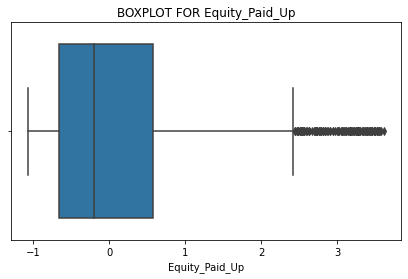

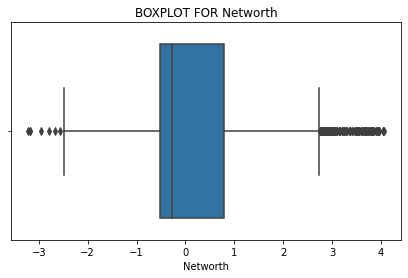

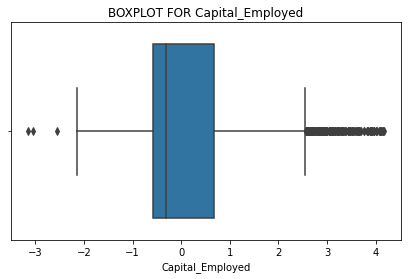

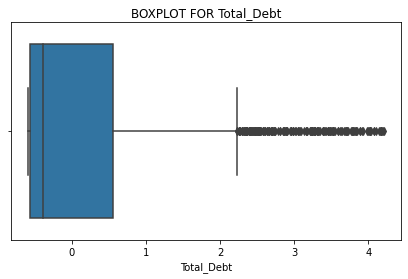

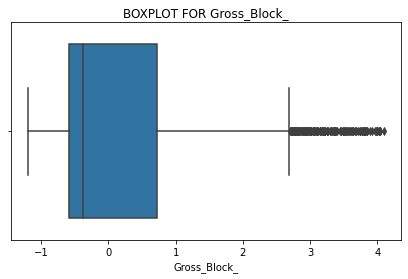

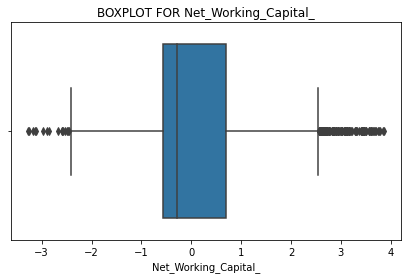

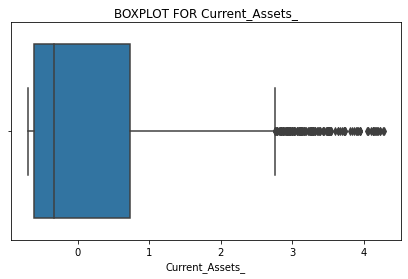

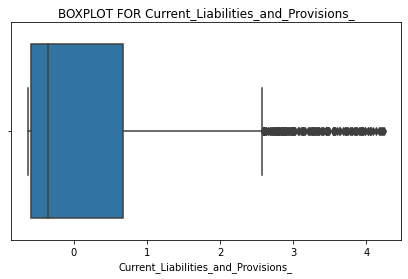

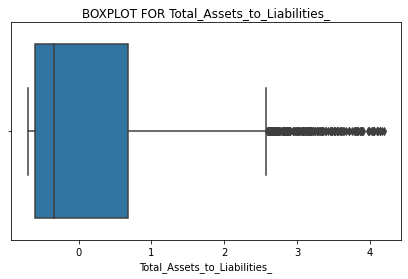

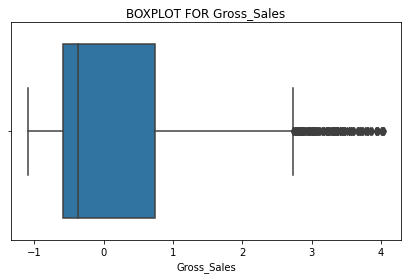

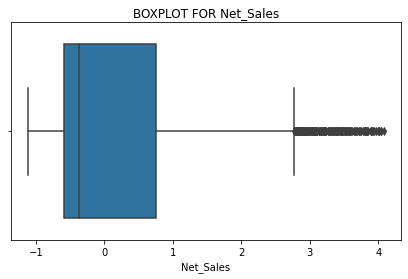

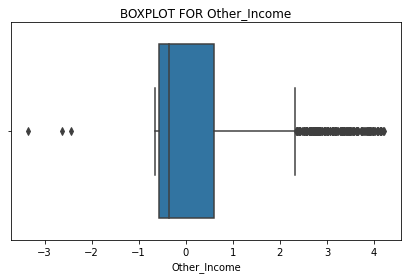

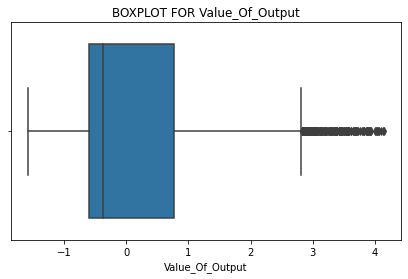

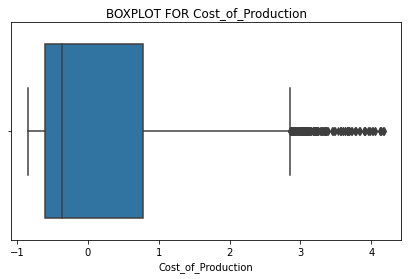

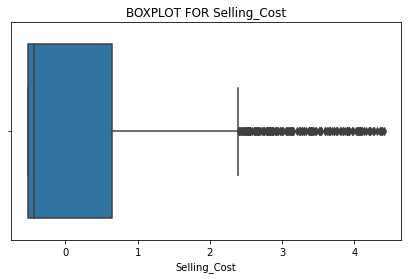

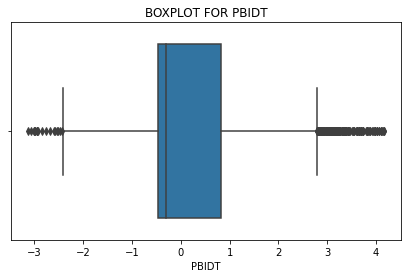

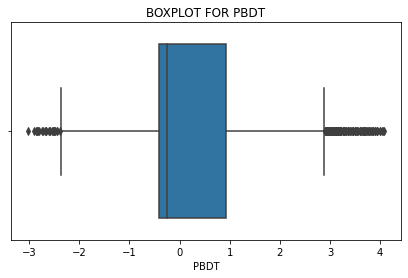

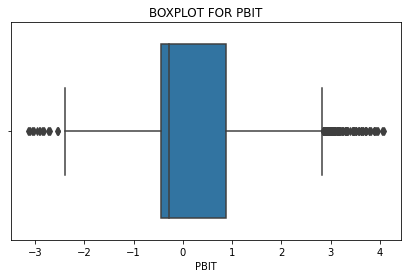

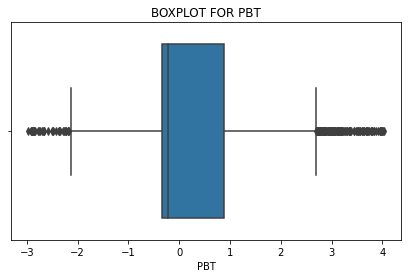

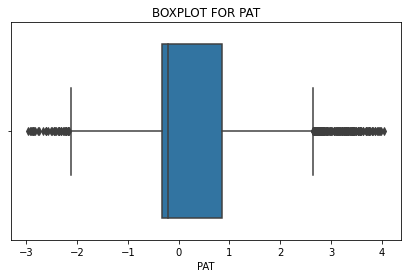

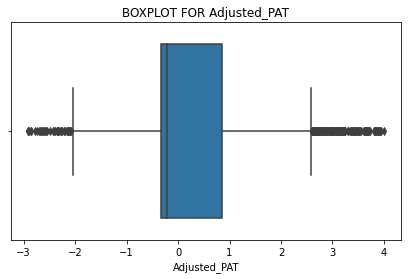

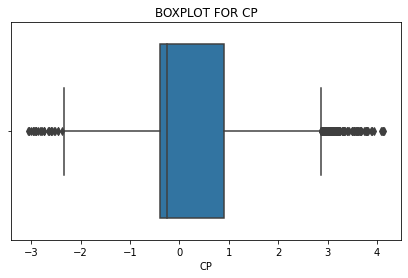

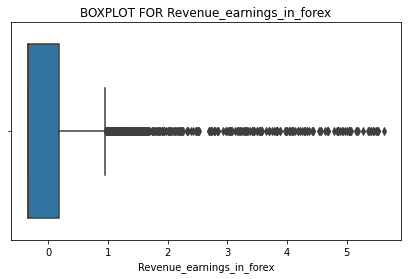

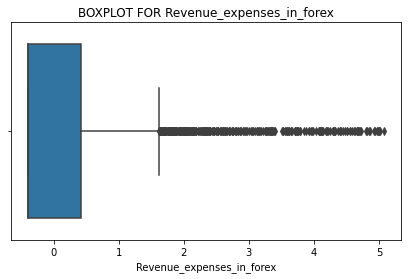

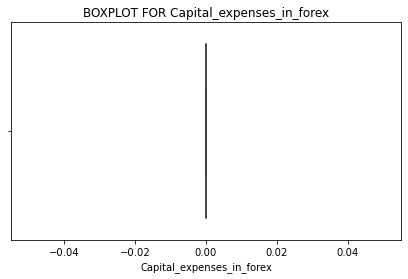

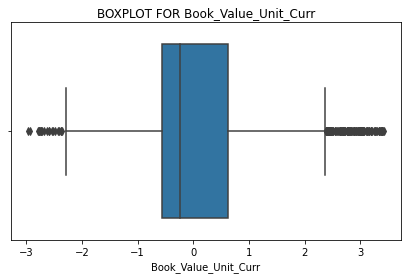

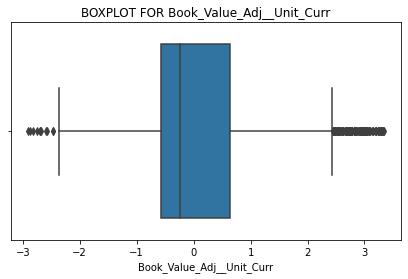

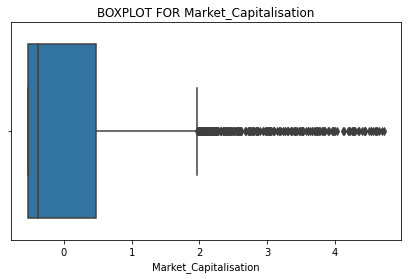

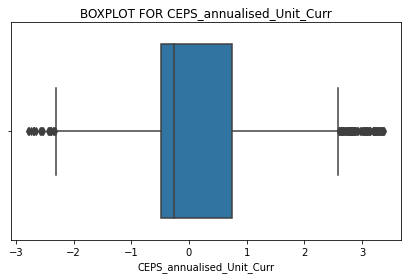

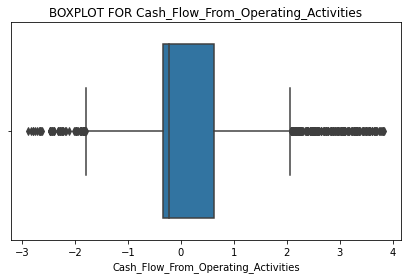

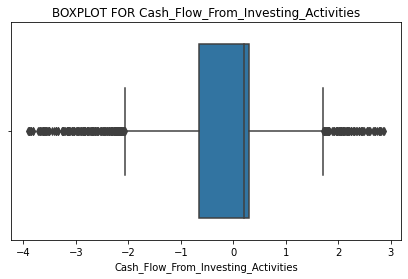

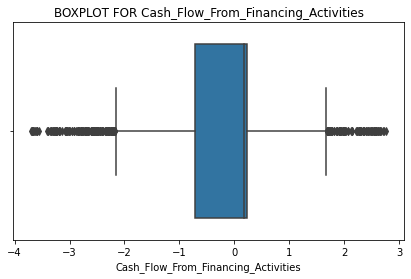

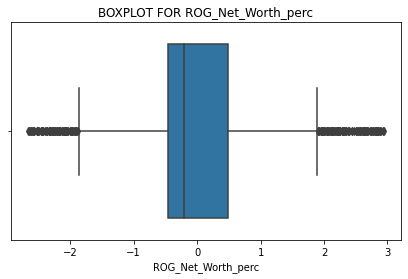

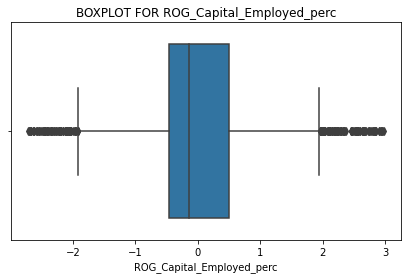

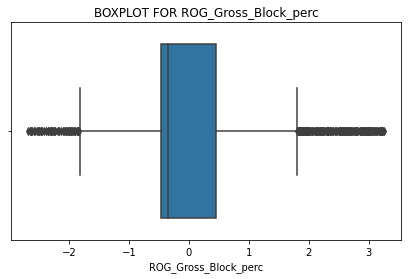

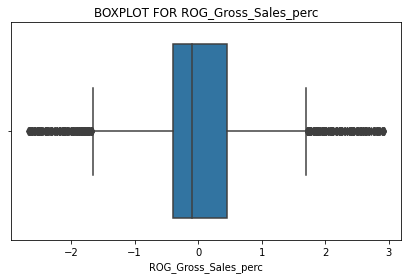

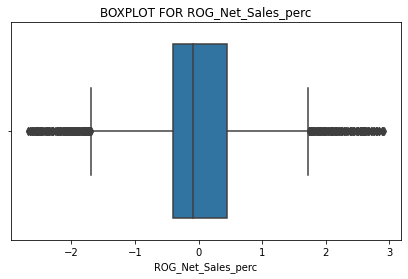

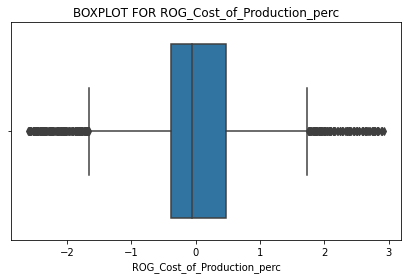

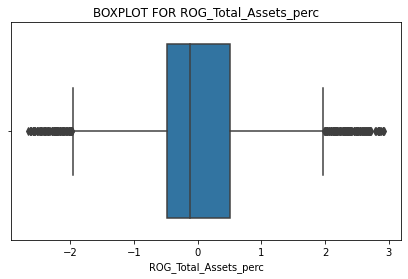

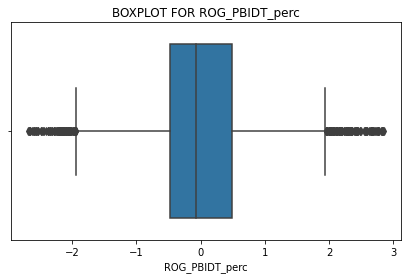

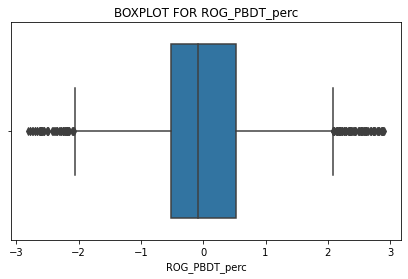

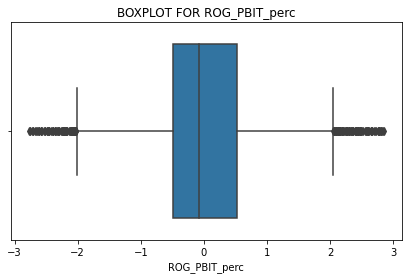

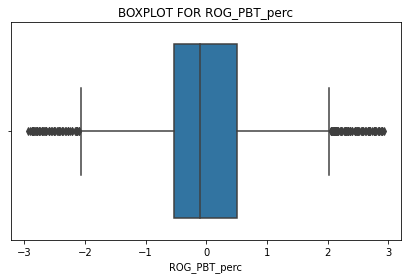

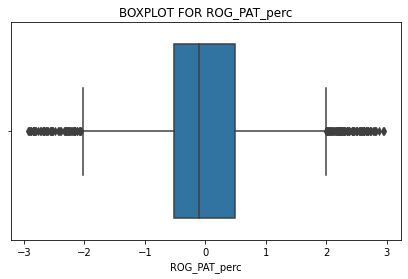

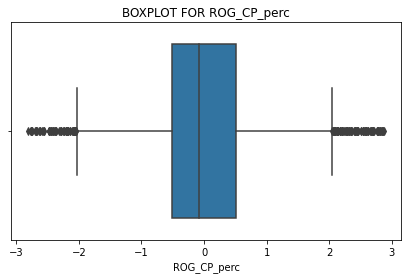

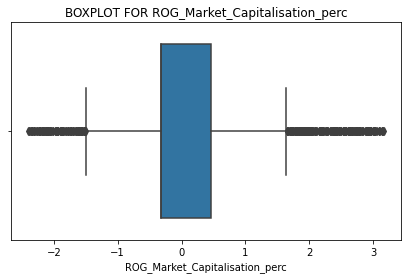

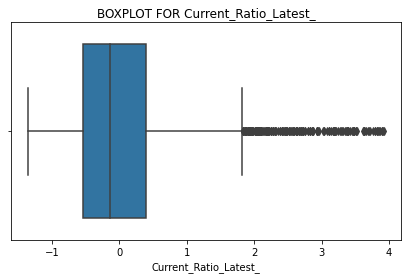

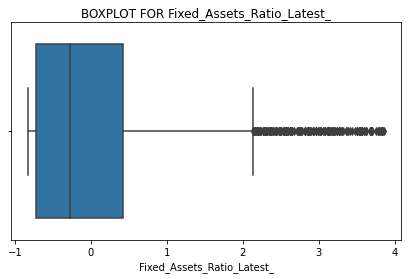

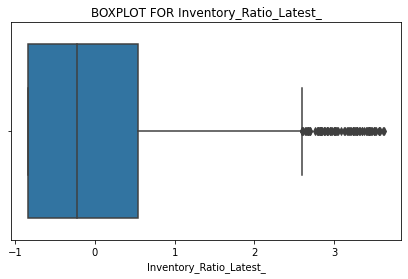

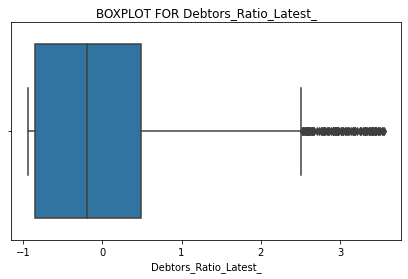

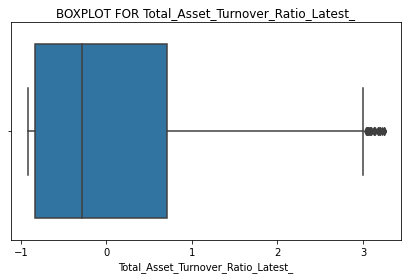

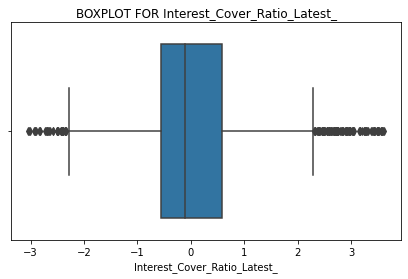

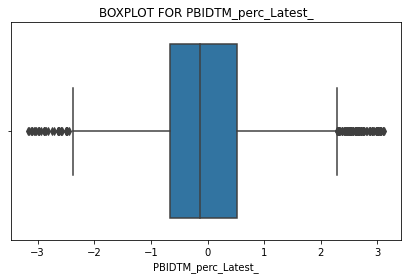

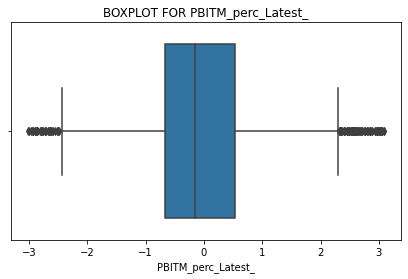

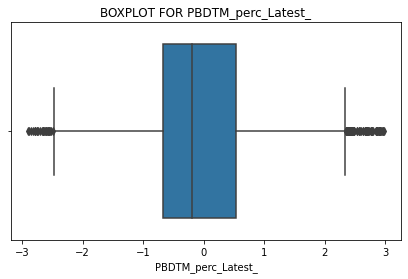

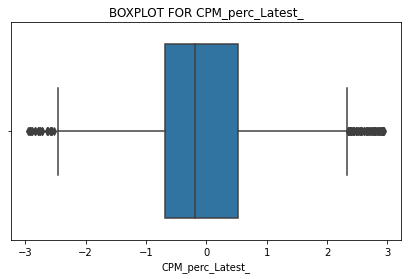

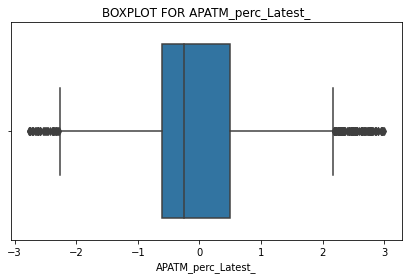

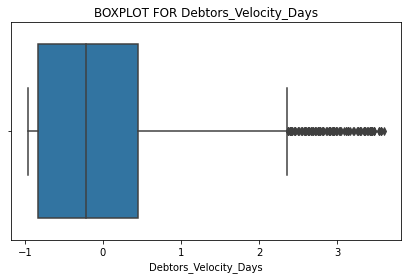

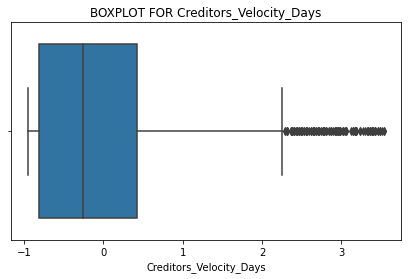

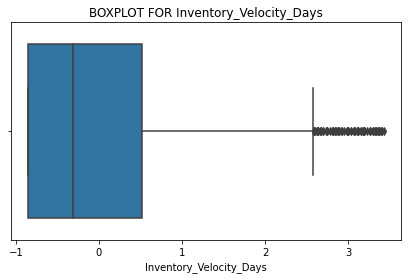

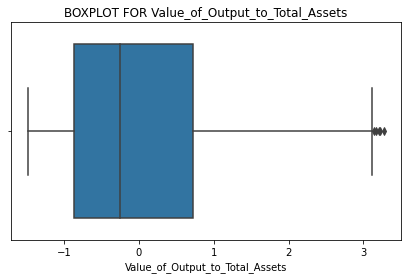

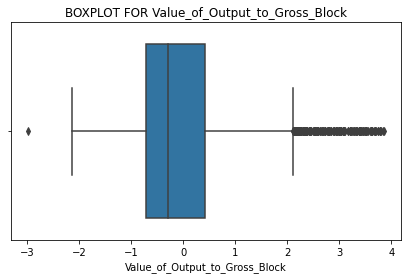

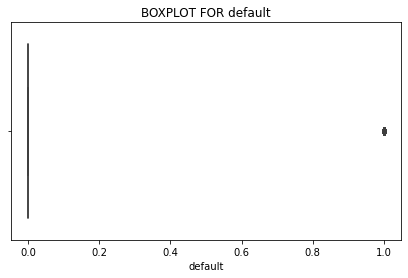

In [53]:
def plot_boxplot(data, feature_list):
    for n in feature_list:
        plt.figure(figsize=(7,4))
        sns.boxplot(df_num1[n])
        plt.title("BOXPLOT FOR {}".format(n))
plot_boxplot(df_num1, df_num1.columns)  

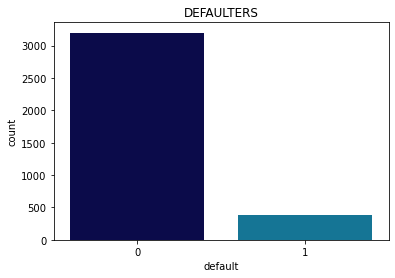

In [54]:
sns.countplot('default',data = company_df1, palette='ocean',order = company_df1['default'].value_counts().index)
plt.title('DEFAULTERS')
plt.show()

<AxesSubplot:xlabel='Gross_Sales', ylabel='Net_Sales'>

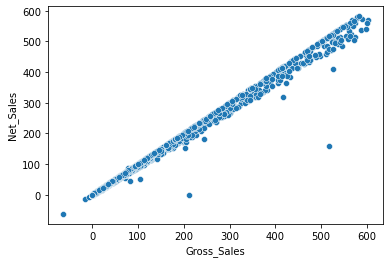

In [55]:
sns.scatterplot(x = 'Gross_Sales' , y = 'Net_Sales', data = company_df1)

<AxesSubplot:xlabel='Networth', ylabel='Capital_Employed'>

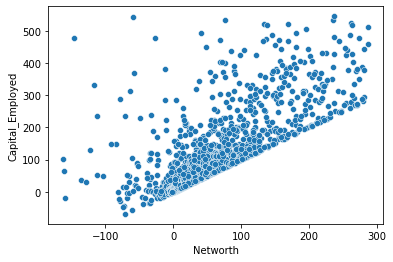

In [56]:
sns.scatterplot(x = 'Networth' , y = 'Capital_Employed', data = company_df1)

<AxesSubplot:xlabel='Networth', ylabel='Cost_of_Production'>

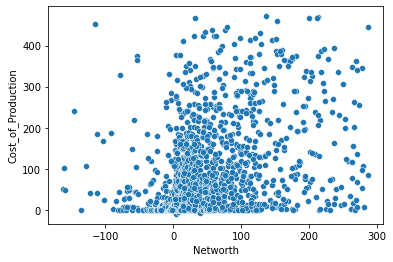

In [57]:
sns.scatterplot(x = 'Networth' , y = 'Cost_of_Production', data = company_df1)

<AxesSubplot:xlabel='PBT', ylabel='PAT'>

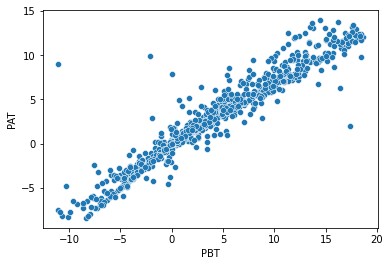

In [58]:
sns.scatterplot(x = 'PBT' , y = 'PAT', data = company_df1)

<AxesSubplot:xlabel='Revenue_earnings_in_forex', ylabel='Revenue_expenses_in_forex'>

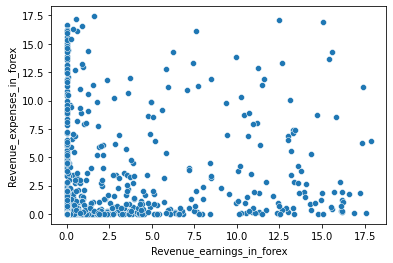

In [59]:
sns.scatterplot(x = 'Revenue_earnings_in_forex' , y = 'Revenue_expenses_in_forex', data = company_df1)

<AxesSubplot:xlabel='Net_Working_Capital_', ylabel='Current_Assets_'>

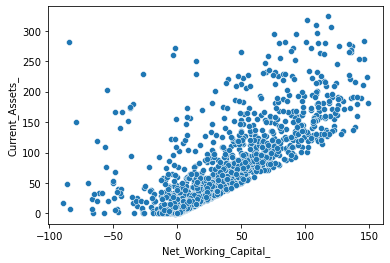

In [60]:
sns.scatterplot(x = 'Net_Working_Capital_' , y = 'Current_Assets_', data = company_df1)

<AxesSubplot:xlabel='Value_Of_Output', ylabel='Cost_of_Production'>

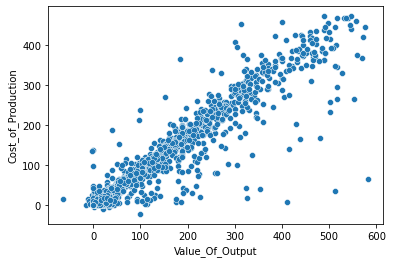

In [61]:
sns.scatterplot(x = 'Value_Of_Output' , y = 'Cost_of_Production', data = company_df1)

<AxesSubplot:xlabel='Selling_Cost', ylabel='Cost_of_Production'>

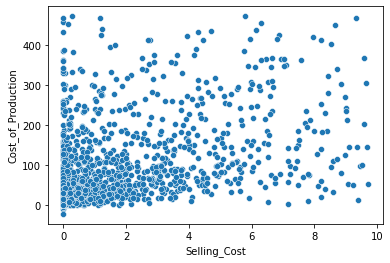

In [62]:
sns.scatterplot(x = 'Selling_Cost' , y = 'Cost_of_Production', data = company_df1)

<AxesSubplot:>

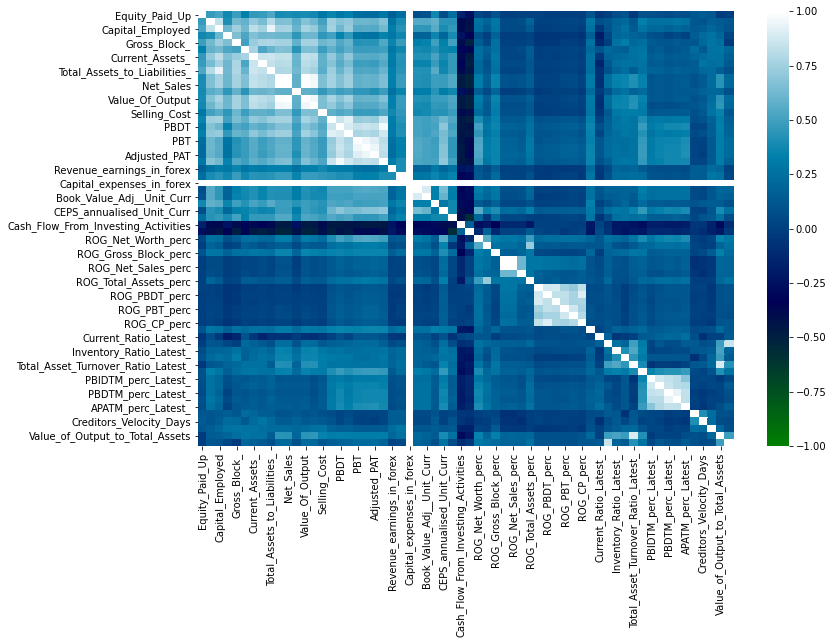

In [63]:
plt.figure(figsize = (12,8))
cor_matrix = Co_imputed.drop('default', axis = 1).corr()
sns.heatmap(cor_matrix, cmap = 'ocean', vmin = -1, vmax= 1)

In [64]:
predictors = Co_imputed.drop('default', axis = 1)
response = Co_imputed['default']

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [66]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response, 
                                                    test_size = 0.33, random_state = 42)

In [67]:
LogR = LogisticRegression()

In [68]:
selector = RFE(estimator = LogR, n_features_to_select=15, step=1)

In [69]:
selector = selector.fit(X_train, y_train)

In [70]:
selector.n_features_

15

In [71]:
selector.ranking_

array([38,  1,  1,  4,  1, 11, 10,  1,  1, 20, 40, 17,  1,  1, 24,  1,  2,
        1, 13, 15, 16,  3, 46, 21, 48,  1,  1, 18, 47, 45, 14, 32,  1,  1,
       39, 34, 35,  9, 23, 43, 42, 30, 41, 29, 44, 36,  1, 12, 28, 33,  7,
        1, 27,  5, 25, 26,  6, 31, 19, 22,  8, 37])

In [72]:
df = pd.DataFrame({'Feature': scaled_predictors.columns, 'Rank': selector.ranking_})
df[df['Rank'] == 1]

,Feature,Rank
1,Networth,1
2,Capital_Employed,1
4,Gross_Block_,1
7,Current_Liabilities_and_Provisions_,1
8,Total_Assets_to_Liabilities_,1
12,Value_Of_Output,1
13,Cost_of_Production,1
15,PBIDT,1
17,PBIT,1
25,Book_Value_Unit_Curr,1


In [73]:
import statsmodels.formula.api as SM

In [74]:
Default_train = pd.concat([X_train,y_train], axis=1)
Default_test = pd.concat([X_test,y_test], axis=1)

In [75]:
Default_train["default"].value_counts()

0.00    2157
1.00     245
Name: default, dtype: int64

In [76]:
Default_train.default.sum() / len(Default_train.default)

0.10199833472106577

In [77]:
model_1 = SM.logit(formula = 'default ~ Networth + Capital_Employed + Gross_Block_ + Current_Liabilities_and_Provisions_ + Total_Assets_to_Liabilities_ + Value_Of_Output + Cost_of_Production + PBIDT + PBIT + Book_Value_Unit_Curr + Book_Value_Adj__Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + Current_Ratio_Latest_ + Interest_Cover_Ratio_Latest_ ', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.136292
         Iterations 10


In [78]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2386
Method:                           MLE   Df Model:                           15
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:                  0.5863
Time:                        23:15:18   Log-Likelihood:                -327.37
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                3.686e-188
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -5.2239      0.292    -17.872      0.000      -5.797      -4.651
Networth                               -1.5555      0.334     -4.664      0.000      -2.209      -0.902
Capital_Employed                       -0.7493      0.309     -2.424      0.015      -1.355      -0.143
Gross_Block_                            0.8500      0.228      3.733      0.000       0.404       1.296
Current_Liabilities_and_Provisions_     0.7379      0.236      3.125      0.002       0.275       1.201
Total_Assets_to_Liabilities_            0.7680      0.306      2.509      0.012       0.168       1.368
Value_Of_Output                        -1.8154      0.552     -3.290      0.001      -2.897      -0.734
Cost_of_Production                      1.6849      0.489      3.447      0.001       0.727       2.643
PBIDT                                  -1.2197      0.257     -4.745      0.000      -1.724      -0.716
PBIT                                    0.9219      0.251      3.670      0.000       0.430       1.414
Book_Value_Unit_Curr                   -2.0100      0.544     -3.693      0.000      -3.077      -0.943
Book_Value_Adj__Unit_Curr              -1.5899      0.539     -2.950      0.003      -2.646      -0.533
ROG_Net_Worth_perc                     -0.5607      0.149     -3.768      0.000      -0.852      -0.269
ROG_Capital_Employed_perc               0.4830      0.132      3.672      0.000       0.225       0.741
Current_Ratio_Latest_                  -1.0811      0.163     -6.639      0.000      -1.400      -0.762
Interest_Cover_Ratio_Latest_           -0.7117      0.167     -4.265      0.000      -1.039      -0.385
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.25 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [79]:
from sklearn.metrics import confusion_matrix, classification_report

In [80]:
y_prob_pred_train = model_1.predict(Default_train)
y_prob_pred_train

662    0.09
1373   0.00
3268   0.08
3246   0.00
1456   0.00
       ... 
1130   0.00
1294   0.01
860    0.03
3507   0.00
3174   0.00
Length: 2402, dtype: float64

In [81]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

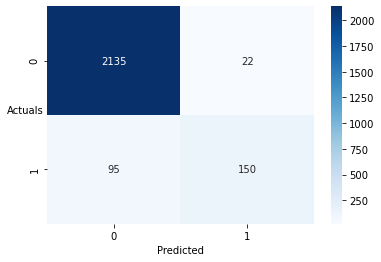

In [82]:
sns.heatmap((metrics.confusion_matrix(Default_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [83]:
print(metrics.classification_report(Default_train['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.957     0.990     0.973      2157
         1.0      0.872     0.612     0.719       245

    accuracy                          0.951      2402
   macro avg      0.915     0.801     0.846      2402
weighted avg      0.949     0.951     0.947      2402



In [84]:
y_prob_pred_test = model_1.predict(Default_test)
y_prob_pred_test

3163   0.00
3133   0.00
937    0.19
196    0.95
2852   0.00
       ... 
2953   0.00
3116   0.00
1010   0.00
1292   0.00
2130   0.00
Length: 1184, dtype: float64

In [85]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

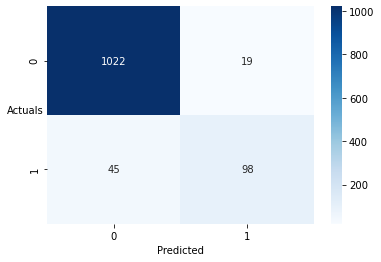

In [86]:
sns.heatmap((metrics.confusion_matrix(Default_test['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [87]:
print(metrics.classification_report(Default_test['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.958     0.982     0.970      1041
         1.0      0.838     0.685     0.754       143

    accuracy                          0.946      1184
   macro avg      0.898     0.834     0.862      1184
weighted avg      0.943     0.946     0.944      1184

